In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Survived'].unique()

array([0, 1], dtype=int64)

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

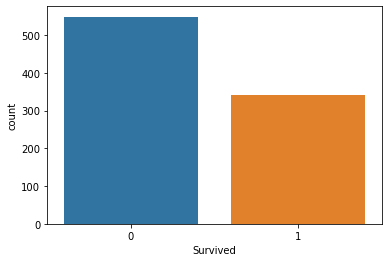

In [8]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df)

In [9]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

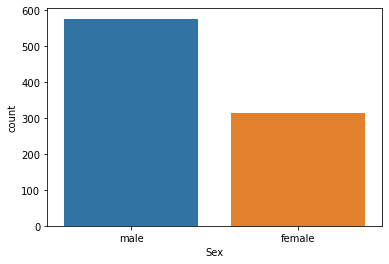

In [11]:
sns.countplot(x='Sex',data=df)
plt.show()

In [12]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [13]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

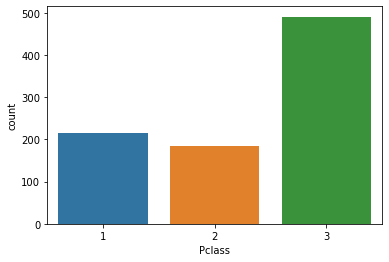

In [14]:
sns.countplot(x='Pclass',data=df)

In [15]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [16]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

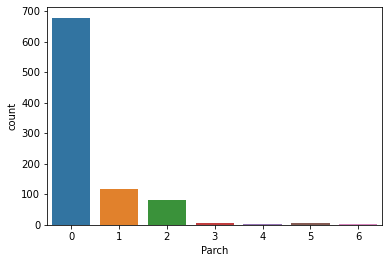

In [20]:
sns.countplot(x='Parch',data=df)

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

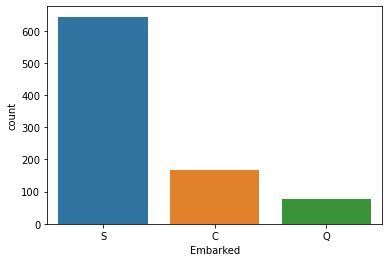

In [23]:
sns.countplot(x='Embarked',data=df)

# encoding of dataframe

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lab=LabelEncoder()

In [26]:
df1=lab.fit_transform(df['Sex'])
pd.Series(df1)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [27]:
df['Sex']=df1

now, same coding is work to transform the Embarked into some numbers:

In [28]:
df2=lab.fit_transform(df['Embarked'])

In [29]:
df['Embarked']=df2

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [31]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
df['Cabin'].nunique()

147

# checking the distribution of the continuous value of the integer type columns


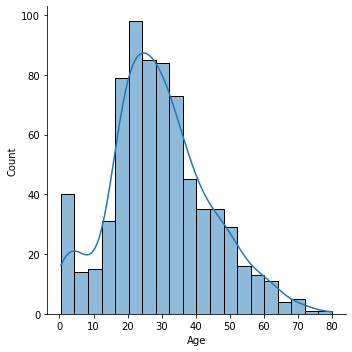

In [33]:
sns.displot(df['Age'],kde=True)

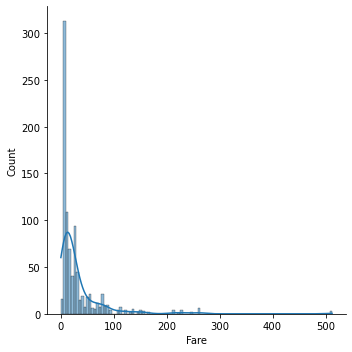

In [34]:
sns.displot(df['Fare'],kde=True)

In [35]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
df['Cabin'].nunique()

147

In [37]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

we are seeing here the columns: 'NAME' , 'CABIN' , 'TICKET' . these were nominal data which is not contributing to target variable. so , we are gonna delete these columns.

In [38]:
df=df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1)

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [40]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

here, we have observed 177 missing values in 'Age' column. now, we are gonna handle this. there are two option we have, either we are going to apply mean or median function as its a continuous data , or simple delete them.

if we gonna apply mean or median function to treat null values , it will misslead our dataset because 'Age' column will play a big role in survival rate. that's why we simply going to delete them.

In [42]:
df =df.dropna(axis=0, subset=['Age'])

In [43]:
df.shape

(714, 8)

In [44]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,1.599440
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.781483
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,3.000000


In [46]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

<AxesSubplot:>

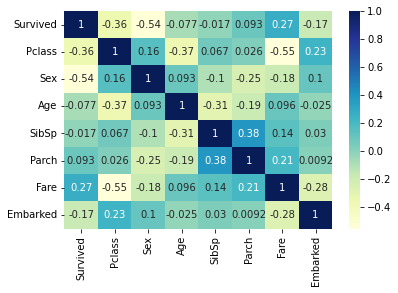

In [47]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Survival Based on Passenger Class(P-Class):

Text(0.5, 1.0, 'bar graph of people according to ticket class in which people not survived')

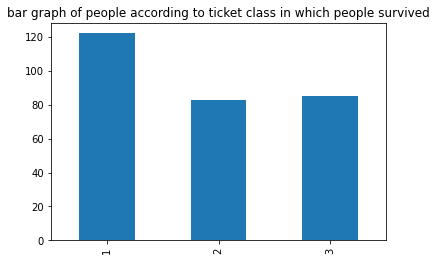

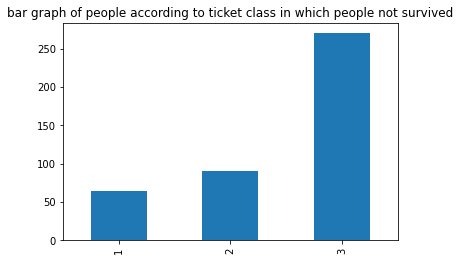

In [56]:
plt.figure(1)
df.loc[df['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('bar graph of people according to ticket class in which people survived')

plt.figure(2)
df.loc[df['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('bar graph of people according to ticket class in which people not survived')

# Survival Based on Age:

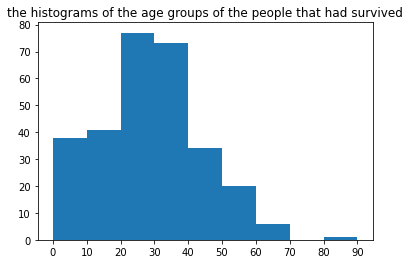

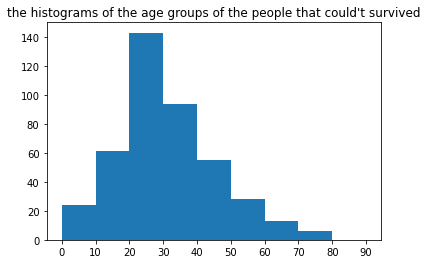

In [58]:
plt.figure(1)
age=df.loc[df['Survived']==1,'Age']
plt.title('the histograms of the age groups of the people that had survived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.show()

plt.figure(2)
age=df.loc[df['Survived']==0,'Age']
plt.title("the histograms of the age groups of the people that could\'t survived")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.show()

# Survival Based upon Embarked:

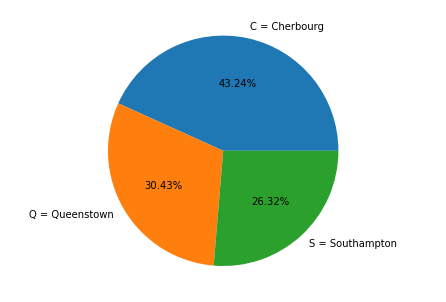

In [64]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['C = Cherbourg','Q = Queenstown','S = Southampton']
s=[0.553571,0.389610,0.336957]
ax.pie(s, labels=l,autopct='%1.2f%%')
plt.show()

# now we could even find the Survival rate Dependancy comparing with individual lebels without plotting them like above:

1. considering passenger class(P-Class)

In [66]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


2.considering SibSp Label:

In [67]:
df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.371550
3,3,0.333333
4,4,0.166667
5,5,0.000000


In [71]:
df['SibSp'].value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

3.considering Embarked Label:

In [70]:
df[["Embarked",'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
3,3,1.000000
0,0,0.607692
2,2,0.362816
1,1,0.285714


In [72]:
df['Embarked'].value_counts()

2    554
0    130
1     28
3      2
Name: Embarked, dtype: int64

# Train Test split:

In [73]:
X = df.drop(['Survived'],axis=1) 
y = df['Survived']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Standardizing the data:

In [75]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# LogisticRegression:

In [77]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [78]:
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)


In [79]:
print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.56
Model Accuracy Score : 76.92


# Support Vector Machines:

In [80]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

In [81]:
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [82]:
print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 84.76
Model Accuracy Score  : 82.52


# KNeighborsClassifier:

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

In [84]:
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [85]:
print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 88.09
Model Accuracy Score  : 77.62


# DecisionTreeClassifier:

In [86]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

In [87]:
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [88]:
print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 98.42
Model Accuracy Score  : 76.22


# RandomForestClassifier:

In [89]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9842381786339754

In [90]:
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [91]:
print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 98.42
Model Accuracy Score  : 81.12


# XGBClassifier:

In [92]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)


0.968476357267951

In [93]:
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

In [94]:
print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 96.85
Model Accuracy Score  : 79.02


# comparing models:

In [95]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest','Decision Tree',
         'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, decision_train, random_forest_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, decision_accuracy, random_forest_accuracy, xgb_accuracy
    ]
})

In [96]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
3,Random Forest,98.42,76.22
4,Decision Tree,98.42,81.12
5,XGBClassifier,96.85,79.02
2,Logistic Regression,88.09,77.62
1,KNN,84.76,82.52
0,Support Vector Machines,80.56,76.92


In [97]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
1,KNN,84.76,82.52
4,Decision Tree,98.42,81.12
5,XGBClassifier,96.85,79.02
2,Logistic Regression,88.09,77.62
0,Support Vector Machines,80.56,76.92
3,Random Forest,98.42,76.22


# Here, we have seen that knn model is working best for our dataset. Hence, we will go for the Random Forest model.

In [110]:
import pickle
filename='titanic.pkl'
pickle.dump(random_forest,open(filename,'wb'))

# Conclusion:

In [111]:
loaded_model=pickle.load(open('titanic.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

81.11888111888112
